In [12]:
""" 寻找最短路径的经典递归方法 """

import math as m

def find_optimal_path(points, cur_path, cur_length, optimal_path, threshold):
    """
    points: 当前图中还未连接的点集
    cur_path: 当前形成的路径
    cur_length: 当前路径的长度
    optimal_path: 最优路径
    threshold: 最优路径的长度
    """
    
    if len(points) == 1:
        # 只剩终点了
        

    if not points:
        if cur_length < threshold:
            for i in range(len(cur_path)):
                optimal_path[i] = cur_path[i][:]
            threshold = cur_length
        return threshold

    point_num = len(points)
    for i in range(point_num):
        cur_point = points.pop(i)
        tmp_len = 0
        if cur_path:
            tmp_len = m.sqrt(pow(cur_point[0] - cur_path[-1][0], 2) + pow(cur_point[1] - cur_path[-1][1], 2))
        cur_path.append(cur_point)

        threshold = find_optimal_path(points, cur_path, cur_length + tmp_len, optimal_path, threshold)

        cur_path.pop()
        points.insert(i, cur_point)

    return threshold

In [1]:
""" K-means算法 """

import random
import math as m

# 分配数据点
def find_optimal_cluster(point, centroids):
    min_length = 100000
    target_cluster = -1
    for i in range(len(centroids)):
        cur_length = m.sqrt(pow(centroids[i][0] - point[0], 2) + pow(centroids[i][1] - point[1], 2))
        if cur_length < min_length:
            min_length = cur_length
            target_cluster = i
    return target_cluster


def k_means(points, cluster_num):
    point_num = len(points)
    if point_num < cluster_num:
        print("聚类数量太多了！")
        return
    
    # 随机选择聚类中心点
    centroids = []
    tmp_point_index = [i for i in range(point_num)]
    while len(centroids) < cluster_num:
        tmp_index = random.randint(0, len(tmp_point_index) - 1)
        tmp_index = tmp_point_index.pop(tmp_index)
        centroids.append(points[tmp_index])
    print(centroids)
            
    # 分配数据点
    clusters = [[] for i in range(cluster_num)]
    for i in range(point_num):
        target_cluster = find_optimal_cluster(points[i], centroids)
        clusters[target_cluster].append(points[i])
    
    # 迭代过程
    for i in range(20):
        # 更新聚类中心点
        for j in range(cluster_num):
            tmp_x = 0.
            tmp_y = 0.
            for point in clusters[j]:
                tmp_x += point[0]
                tmp_y += point[1]
            centroids[j] = [tmp_x / len(clusters[j]), tmp_y / len(clusters[j])]
            
        # 更新数据点
        new_clusters = [[] for i in range(cluster_num)]
        is_terminate = True
        for j in range(cluster_num):
            for point in clusters[j]:
                new_target_cluster = find_optimal_cluster(point, centroids)
                new_clusters[new_target_cluster].append(point)
                if new_target_cluster != j:
                    is_terminate = False
        clusters = new_clusters
        if is_terminate:
            break
        
#         colors = plt.cm.rainbow(np.linspace(0, 1, 22))
#         for i in np.arange(22):
#             plt.scatter(centroids[i][0], centroids[i][1], color=colors[i], s=30, marker='x')
#             for point in clusters[i]:
#                 plt.scatter(point[0], point[1], color=colors[i], s=5)
#         plt.show()
            
    return centroids, clusters

In [ ]:
""" 完整过程 """



51
[[52.0, 41.0], [30.0, 48.0], [32.0, 39.0], [25.0, 32.0], [58.0, 48.0], [52.0, 64.0], [5.0, 64.0], [43.0, 67.0], [51.0, 21.0]]


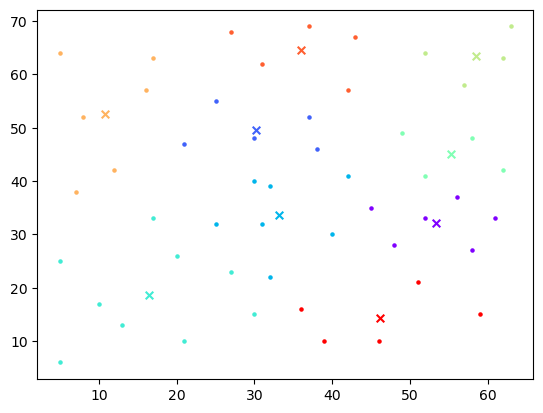

In [2]:
import matplotlib.pyplot as plt
import numpy as np

with open('../dataset/eil51.tsp', 'r') as file:
    lines = file.readlines()
    
lines = lines[6: -1]
points = []
for line in lines:
    point = line.strip().split(' ')[1:]
    points.append([float(point[i]) for i in np.arange(len(point))])
print(len(points))
    
centroids, clusters = k_means(points, 9)

colors = plt.cm.rainbow(np.linspace(0, 1, 9))
for i in np.arange(9):
    plt.scatter(centroids[i][0], centroids[i][1], color=colors[i], s=30, marker='x')
    for point in clusters[i]:
        plt.scatter(point[0], point[1], color=colors[i], s=5)
plt.show()

In [13]:
points = [[22, 23],
          [21, 4],
          [13, 13],
          [16, 6],
          [13, 23], ]
optimal_path = [0 for _ in range(len(points))]
threshold = 100000
threshold = find_optimal_path(points, [], 0, optimal_path, threshold)
print(optimal_path)
print(threshold)

[[22, 23], [13, 23], [13, 13], [16, 6], [21, 4]]
32.00093791299841


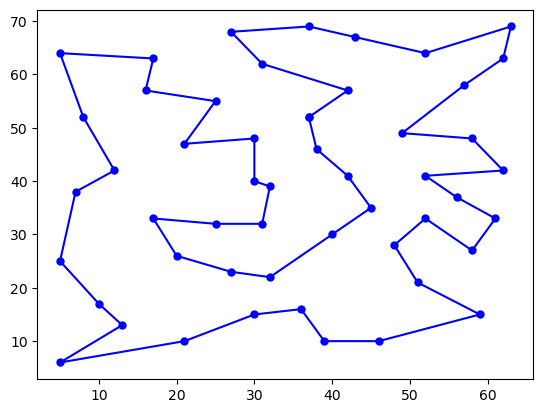

In [7]:
import matplotlib.pyplot as plt

with open('../dataset/eil51.tsp', 'r') as file:
    lines = file.readlines()
    
point_dict = dict()
lines = lines[6: -1]
for line in lines:
    tmp_point = line.strip().split(' ')
    tmp_point = [int(x) for x in tmp_point]
    point_dict[tmp_point[0]] = tuple(tmp_point[1:])

with open('../estimation/eil51.opt.tour', 'r') as file:
    lines = file.readlines()

lines = lines[5: -2]
path = []
for line in lines:
    path.append(int(line))

x_values = [*[point_dict[path[i]][0] for i in range(len(path))], point_dict[1][0]]
y_values = [*[point_dict[path[i]][1] for i in range(len(path))], point_dict[1][1]]
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', markersize=5, label='折线图')
plt.show()